Author: Amelia Xie

Date: 10/10/22

10/10/22

# Sub-question

What are the trends for hourly step count data across the week?

Let's load in the data

In [1]:
import pandas as pd
PATH = '../../../datasets/Modified_dataset08.csv' 
p8 = pd.read_csv(PATH)
p8_copy = p8.copy() #make a copy of the data

Let's visualise the distribution of the hourly step count data for each day of the week.

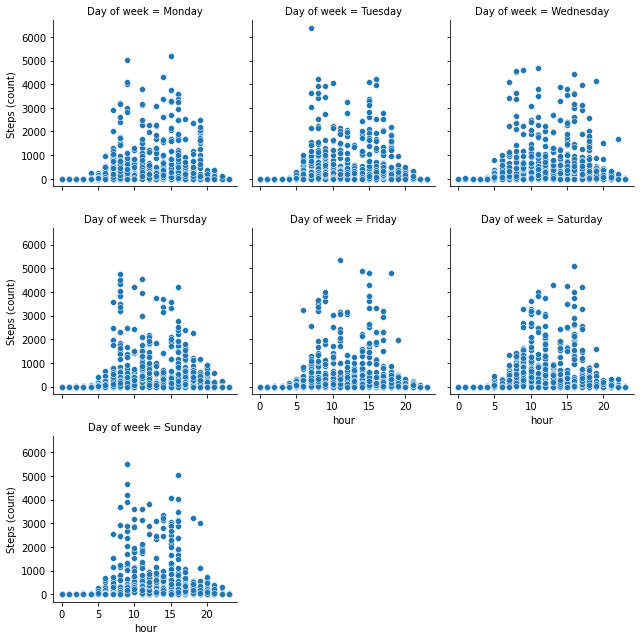

In [2]:
import seaborn as sns
plot = sns.FacetGrid(p8, col ='Day of week',                     
col_order = [
    'Monday',
    'Tuesday',
    'Wednesday',
    'Thursday',
    'Friday',
    'Saturday',
    'Sunday'
], col_wrap = 3)
plot.map_dataframe(sns.scatterplot, "hour", "Steps (count)")

From the plots we can see that the step counts of this participant is quite widespread, although it seems that most instances have very little physical activity.

The hourly trends can be more closely analysed with a heatmap.

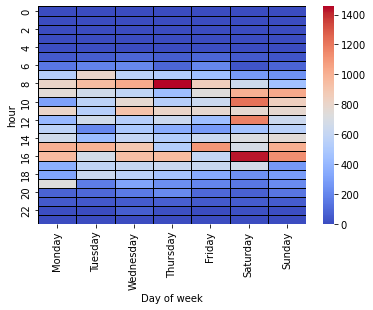

In [3]:
# code taken from Emily's TPP09 notebook
# obtain the mean step counts for each hour of each day of the week
hour_dow_count = p8_copy.groupby(['hour','Day of week']).agg({'Steps (count)': 'mean'}).reset_index()
# change the format such that each cell contains a step count value
hour_dow_count = hour_dow_count.pivot("hour", "Day of week", "Steps (count)")
# change the order of the days of the week
hour_dow_count = hour_dow_count.reindex(
columns = [
    'Monday',
    'Tuesday',
    'Wednesday',
    'Thursday',
    'Friday',
    'Saturday',
    'Sunday'])
# plot the heatmap
hmap = sns.heatmap(hour_dow_count, cmap="coolwarm", linewidths=.5, linecolor = 'black')

The highest step counts were recorded at 8 am on Thursday and 4 pm on Saturday. The step count activity appears sporadically, and it is hard to determine a pattern for this participant. 

## References
* pandas.DataFrame.sort_values — pandas 1.5.0 documentation. Pandas. (2022). Retrieved 10 October 2022, from https://pandas.pydata.org/pandas-docs/stable/reference/api/pandas.DataFrame.sort_values.html.
* 5 ways to apply an IF condition in Pandas DataFrame - Data to Fish. Data to Fish. (2022). Retrieved 10 October 2022, from https://datatofish.com/if-condition-in-pandas-dataframe/.